## Initial Imports

In [1]:
#importing required libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import ExcelWriter
import backend as bk
from sklearn.neural_network import MLPClassifier
import pandas_profiling
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from pandas import ExcelWriter
from sklearn import preprocessing
from sklearn.decomposition import PCA

#set plot style to 'ggplot' and don't limit the view of DF when diaplyhign them to screen
plt.style.use('ggplot')
pd.options.display.max_columns = None

## Read the CSV

In [2]:
#importing our data and resetting our index
df = pd.read_excel('../Data/Comp2_Raw_Data.xls')
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1


## Renaming and Dropping Columns We Do Not Need

In [3]:
df = df.drop(columns = ['ID'])
df.columns = ['Credit_Limit', 'Gender', 'Education', 'Marriage',  'Age', 'Pay_Sept', 'Pay_Aug', 'Pay_Jul', 'Pay_Jun', 'Pay_May', 'Pay_Apr', 
             'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_Jul', 'Bill_Amt_Jun', 'Bill_Amt_May', 'Bill_Amt_Apr','Pay_Amt_Sept', 'Pay_Amt_Aug',
             'Pay_Amt_Jul', 'Pay_Amt_Jun', 'Pay_Amt_May', 'Pay_Amt_Apr', 'Default']
df.head(5)

,Credit_Limit,Gender,Education,Marriage,Age,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sept,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Creating a Target DF and A Predicter DF

In [4]:
#Copy our target variables to their own df
df_target = df[['Default']].copy()
df_target.head(10)
df_target['Default'] = pd.Categorical(df_target.Default)
#Drop Default from our target variable df
df = df.drop(['Default'], axis=1)
df.head(5)

,Credit_Limit,Gender,Education,Marriage,Age,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sept,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [5]:
df_target.head(5)

,Default
0,1
1,1
2,0
3,0
4,0


In [6]:
df_target.dtypes

Default    category
dtype: object

## Changing Data Types

In [7]:
df.dtypes

Credit_Limit     int64
Gender           int64
Education        int64
Marriage         int64
Age              int64
Pay_Sept         int64
Pay_Aug          int64
Pay_Jul          int64
Pay_Jun          int64
Pay_May          int64
Pay_Apr          int64
Bill_Amt_Sept    int64
Bill_Amt_Aug     int64
Bill_Amt_Jul     int64
Bill_Amt_Jun     int64
Bill_Amt_May     int64
Bill_Amt_Apr     int64
Pay_Amt_Sept     int64
Pay_Amt_Aug      int64
Pay_Amt_Jul      int64
Pay_Amt_Jun      int64
Pay_Amt_May      int64
Pay_Amt_Apr      int64
dtype: object

In [8]:
for col in df:
    df[col]=pd.to_numeric(df[col], errors='coerce', downcast='float')
df.dtypes

Credit_Limit     float32
Gender           float32
Education        float32
Marriage         float32
Age              float32
Pay_Sept         float32
Pay_Aug          float32
Pay_Jul          float32
Pay_Jun          float32
Pay_May          float32
Pay_Apr          float32
Bill_Amt_Sept    float32
Bill_Amt_Aug     float32
Bill_Amt_Jul     float32
Bill_Amt_Jun     float32
Bill_Amt_May     float32
Bill_Amt_Apr     float32
Pay_Amt_Sept     float32
Pay_Amt_Aug      float32
Pay_Amt_Jul      float32
Pay_Amt_Jun      float32
Pay_Amt_May      float32
Pay_Amt_Apr      float32
dtype: object

## Creating Variables To Use

## Binning Age


In [9]:
df.head()

,Credit_Limit,Gender,Education,Marriage,Age,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sept,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [10]:
df.shape

(30000, 23)

## EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f355fd8aef0>,
      dtype=object)

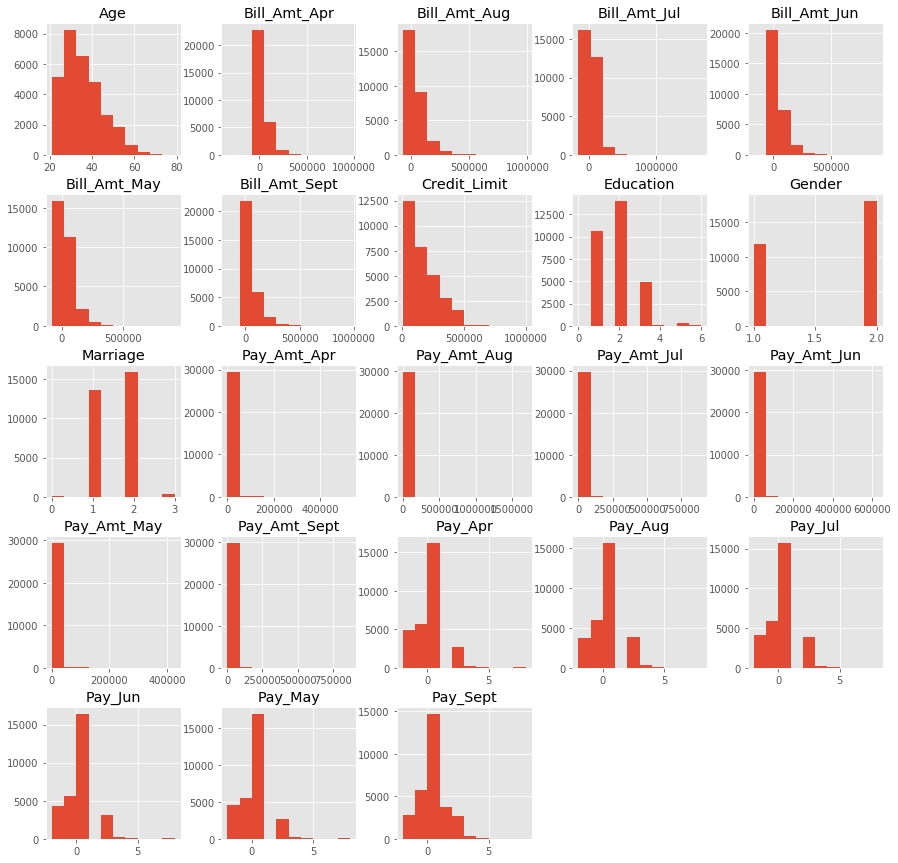

In [11]:
pd.DataFrame.hist(df, figsize = [15,15])

In [12]:
df.skew()

Credit_Limit      0.992867
Gender           -0.424183
Education         0.970972
Marriage         -0.018742
Age               0.732246
Pay_Sept          0.731975
Pay_Aug           0.790565
Pay_Jul           0.840682
Pay_Jun           0.999629
Pay_May           1.008197
Pay_Apr           0.948029
Bill_Amt_Sept     2.663861
Bill_Amt_Aug      2.705221
Bill_Amt_Jul      3.087830
Bill_Amt_Jun      2.821965
Bill_Amt_May      2.876380
Bill_Amt_Apr      2.846645
Pay_Amt_Sept     14.668365
Pay_Amt_Aug      30.453817
Pay_Amt_Jul      17.216637
Pay_Amt_Jun      12.904985
Pay_Amt_May      11.127418
Pay_Amt_Apr      10.640728
dtype: float32

In [13]:
df.describe()

,Credit_Limit,Gender,Education,Marriage,Age,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sept,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.328125,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.335938,49179.078125,4.701315e+04,43262.949219,40311.398438,38871.761719,5663.580566,5.921164e+03,5225.681641,4826.076660,4799.387695,5215.502441
std,129747.664062,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.859375,71173.773438,6.934938e+04,64332.855469,60797.156250,59554.105469,16563.281250,2.304087e+04,17606.960938,15666.160156,15278.305664,17777.466797
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.000000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.000000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [14]:
#scale our continous fields
columns = ['Bill_Amt_Apr', 'Bill_Amt_May', 'Bill_Amt_Jun', 'Bill_Amt_Jul', 'Bill_Amt_Aug', 'Bill_Amt_Sept', 
           'Pay_Amt_Apr', 'Pay_Amt_May', 'Pay_Amt_Jun', 'Pay_Amt_Jul', 'Pay_Amt_Aug', 'Pay_Amt_Sept', 'Credit_Limit']
#Copy our target variables to their own df
df_cont = df[columns].copy()

In [15]:
min_max_scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(min_max_scaler.fit_transform(df),columns = df.columns)
df.describe()

,Credit_Limit,Gender,Education,Marriage,Age,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sept,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.159075,0.603733,0.308856,0.517289,0.249750,0.19833,0.186623,0.183380,0.177933,0.173380,0.170890,0.191846,0.112893,0.112157,0.200891,0.120620,0.290851,0.006483,0.003516,0.005832,0.007771,0.011252,0.009865
std,0.131058,0.489129,0.131725,0.173990,0.158929,0.11238,0.119719,0.119687,0.116914,0.113319,0.114999,0.065159,0.067546,0.038076,0.060601,0.060284,0.045766,0.018961,0.013680,0.019650,0.025227,0.035820,0.033627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040404,0.000000,0.166667,0.333333,0.120690,0.10000,0.100000,0.100000,0.100000,0.100000,0.100000,0.149668,0.069053,0.087808,0.162330,0.082396,0.261944,0.001145,0.000495,0.000435,0.000477,0.000592,0.000223
50%,0.131313,1.000000,0.333333,0.666667,0.224138,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,0.166324,0.086340,0.097374,0.178084,0.098600,0.274097,0.002404,0.001193,0.002009,0.002415,0.003517,0.002837
75%,0.232323,1.000000,0.333333,0.666667,0.344828,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,0.205887,0.126964,0.119378,0.211482,0.130415,0.298787,0.005731,0.002969,0.005028,0.006463,0.009452,0.007566
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


for col in df_cont.columns:
    u_bound = df_cont[col].mean() + 3* df_cont[col].std()
    df_cont[col][df_cont[col] > u_bound] = u_bound


In [16]:
df_cont = pd.DataFrame(preprocessing.normalize(df_cont,norm='l2'),columns = df_cont.columns)

In [17]:
df_cont.skew()

Bill_Amt_Apr     0.282054
Bill_Amt_May     0.195824
Bill_Amt_Jun     0.105407
Bill_Amt_Jul     0.051511
Bill_Amt_Aug     0.061943
Bill_Amt_Sept    0.158257
Pay_Amt_Apr      6.325180
Pay_Amt_May      6.017713
Pay_Amt_Jun      6.072741
Pay_Amt_Jul      5.556133
Pay_Amt_Aug      5.628072
Pay_Amt_Sept     5.398783
Credit_Limit    -0.204180
dtype: float64

In [18]:
for col in df_cont.columns:
    df_cont[col]=df_cont[col]+.7
    df_cont[col]=np.log(df_cont[col])

In [19]:
df_cont.describe()

,Bill_Amt_Apr,Bill_Amt_May,Bill_Amt_Jun,Bill_Amt_Jul,Bill_Amt_Aug,Bill_Amt_Sept,Pay_Amt_Apr,Pay_Amt_May,Pay_Amt_Jun,Pay_Amt_Jul,Pay_Amt_Aug,Pay_Amt_Sept,Credit_Limit
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.161467,-0.153246,-0.139412,-0.122638,-0.111349,-0.102037,-0.327556,-0.328485,-0.328042,-0.325535,-0.321263,-0.320682,0.345895
std,0.173914,0.171833,0.177045,0.186509,0.193778,0.199391,0.064639,0.058256,0.060428,0.059987,0.063428,0.061521,0.173268
min,-2.375713,-0.987648,-1.143557,-0.961889,-2.658642,-0.852902,-0.356675,-0.356675,-0.356675,-0.356675,-0.356675,-0.356675,-0.275374
25%,-0.345883,-0.341677,-0.337222,-0.334915,-0.331941,-0.326957,-0.355840,-0.354820,-0.354405,-0.352968,-0.350587,-0.350070,0.170060
50%,-0.170351,-0.149359,-0.122155,-0.088569,-0.070350,-0.061043,-0.342752,-0.342064,-0.342027,-0.339858,-0.336302,-0.334847,0.381477
75%,0.009356,0.017388,0.037349,0.057988,0.066297,0.074256,-0.332748,-0.332212,-0.332501,-0.328022,-0.321775,-0.320327,0.525537
max,0.350161,0.303778,0.389985,0.396205,0.375274,0.456925,0.431324,0.429823,0.500307,0.389395,0.479372,0.362979,0.530628


In [20]:
df_cont.skew()

Bill_Amt_Apr     0.013623
Bill_Amt_May     0.069278
Bill_Amt_Jun    -0.016158
Bill_Amt_Jul    -0.065812
Bill_Amt_Aug    -0.139826
Bill_Amt_Sept   -0.017079
Pay_Amt_Apr      5.374455
Pay_Amt_May      5.198374
Pay_Amt_Jun      5.234579
Pay_Amt_Jul      4.842315
Pay_Amt_Aug      4.793580
Pay_Amt_Sept     4.659171
Credit_Limit    -0.308246
dtype: float64

In [21]:
df_cont.reset_index(drop=True, inplace=True)
for col in df_cont:
    df[col] = df_cont[col]
df.head(5)

,Credit_Limit,Gender,Education,Marriage,Age,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sept,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr
0,0.512306,1.0,0.333333,0.333333,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,-0.116971,-0.162151,-0.310082,-0.356675,-0.356675,-0.356675,-0.356675,-0.310082,-0.356675,-0.356675,-0.356675,-0.356675
1,0.529454,1.0,0.333333,0.666667,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,-0.325307,-0.336387,-0.325307,-0.318537,-0.316446,-0.318663,-0.356675,-0.344864,-0.344864,-0.344864,-0.356675,-0.333191
2,0.468919,1.0,0.333333,0.666667,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,-0.008207,-0.174354,-0.179930,-0.170748,-0.163470,-0.156431,-0.335262,-0.335513,-0.342517,-0.342517,-0.342517,-0.287811
3,0.145502,1.0,0.333333,0.333333,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.121449,0.131452,0.139888,-0.042308,-0.036181,-0.030629,-0.330917,-0.330675,-0.341141,-0.342426,-0.342825,-0.343713
4,0.274432,0.0,0.333333,0.333333,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,-0.215518,-0.261586,0.132196,-0.043023,-0.066358,-0.066556,-0.322092,0.141283,-0.194609,-0.209683,-0.344626,-0.344800


## Feature Selection Steps

In [22]:
#get the data loaded in
dataset = df.values
target = df_target.values.ravel()

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(dataset, target)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False False False False  True  True  True False False False  True
 False False False False False  True  True False  True False False]
[ 1 14 15 12 13  1  1  1 10  4 11  1  7  9  2  6 16  1  1  8  1  3  5]


In [23]:
df.skew()

Credit_Limit    -0.308246
Gender          -0.424183
Education        0.970972
Marriage        -0.018742
Age              0.732246
Pay_Sept         0.731975
Pay_Aug          0.790565
Pay_Jul          0.840682
Pay_Jun          0.999629
Pay_May          1.008197
Pay_Apr          0.948029
Bill_Amt_Sept   -0.017079
Bill_Amt_Aug    -0.139826
Bill_Amt_Jul    -0.065812
Bill_Amt_Jun    -0.016158
Bill_Amt_May     0.069278
Bill_Amt_Apr     0.013623
Pay_Amt_Sept     4.659171
Pay_Amt_Aug      4.793580
Pay_Amt_Jul      4.842315
Pay_Amt_Jun      5.234579
Pay_Amt_May      5.198374
Pay_Amt_Apr      5.374455
dtype: float64

In [24]:
df.shape

(30000, 23)

In [25]:
df['Default'] = df_target

In [26]:
df.head()

,Credit_Limit,Gender,Education,Marriage,Age,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sept,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr,Default
0,0.512306,1.0,0.333333,0.333333,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,-0.116971,-0.162151,-0.310082,-0.356675,-0.356675,-0.356675,-0.356675,-0.310082,-0.356675,-0.356675,-0.356675,-0.356675,1
1,0.529454,1.0,0.333333,0.666667,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,-0.325307,-0.336387,-0.325307,-0.318537,-0.316446,-0.318663,-0.356675,-0.344864,-0.344864,-0.344864,-0.356675,-0.333191,1
2,0.468919,1.0,0.333333,0.666667,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,-0.008207,-0.174354,-0.179930,-0.170748,-0.163470,-0.156431,-0.335262,-0.335513,-0.342517,-0.342517,-0.342517,-0.287811,0
3,0.145502,1.0,0.333333,0.333333,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.121449,0.131452,0.139888,-0.042308,-0.036181,-0.030629,-0.330917,-0.330675,-0.341141,-0.342426,-0.342825,-0.343713,0
4,0.274432,0.0,0.333333,0.333333,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,-0.215518,-0.261586,0.132196,-0.043023,-0.066358,-0.066556,-0.322092,0.141283,-0.194609,-0.209683,-0.344626,-0.344800,0


In [27]:
df[df.columns[:]].corr()['Default'][:-1]

Credit_Limit    -0.108972
Gender          -0.039961
Education        0.028006
Marriage        -0.024339
Age              0.013890
Pay_Sept         0.324794
Pay_Aug          0.263551
Pay_Jul          0.235253
Pay_Jun          0.216614
Pay_May          0.204149
Pay_Apr          0.186866
Bill_Amt_Sept    0.061109
Bill_Amt_Aug     0.078467
Bill_Amt_Jul     0.086730
Bill_Amt_Jun     0.097303
Bill_Amt_May     0.099767
Bill_Amt_Apr     0.103389
Pay_Amt_Sept    -0.054927
Pay_Amt_Aug     -0.064389
Pay_Amt_Jul     -0.047680
Pay_Amt_Jun     -0.045737
Pay_Amt_May     -0.041932
Pay_Amt_Apr     -0.041420
Name: Default, dtype: float64

In [28]:
df = df.drop(['Default'], axis=1)

In [29]:
bk.make_model(df,df_target)

[[5738  168]
 [1228  366]]
Accuracy: 0.8138666666666666
Precision: 0.6853932584269663
Recall: 0.22961104140526975


## Reducing with features

In [30]:
df_corr = df[['Pay_Apr','Pay_May', 'Pay_Jun', 'Pay_Jul', 'Pay_Aug', 'Pay_Sept', 'Credit_Limit', 'Bill_Amt_Apr']].copy()

In [31]:
bk.make_model(df_corr,df_target)

[[5783  123]
 [1237  357]]
Accuracy: 0.8186666666666667
Precision: 0.74375
Recall: 0.22396486825595985


In [32]:
df_RFE = df[['Credit_Limit','Pay_Sept', 'Pay_Aug', 'Pay_Jul', 'Bill_Amt_Apr', 'Pay_Amt_Sept', 'Pay_Amt_Aug', 'Pay_Amt_Jun']].copy()

In [33]:
bk.make_model(df_RFE,df_target)

[[5773  133]
 [1243  351]]
Accuracy: 0.8165333333333333
Precision: 0.7252066115702479
Recall: 0.22020075282308657


In [34]:
pca = PCA(n_components=3)
principalComponents1 = pca.fit_transform(df_corr)
principalDf = pd.DataFrame(data = principalComponents1
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head()

,principal component 1,principal component 2,principal component 3
0,-0.213985,0.162814,0.324918
1,-0.031605,0.283137,-0.088714
2,-0.021419,0.096441,-0.063716
3,0.191744,-0.144621,0.011208
4,0.057659,-0.112120,-0.087103


In [35]:
sum(pca.explained_variance_ratio_)

0.8602325982914802

In [36]:
bk.make_model(principalDf,df_target)

[[5781  125]
 [1261  333]]
Accuracy: 0.8152
Precision: 0.7270742358078602
Recall: 0.20890840652446674


In [63]:
pca = PCA(n_components=4)
principalComponents1 = pca.fit_transform(df_RFE)
principalDf = pd.DataFrame(data = principalComponents1
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'PC4'])
principalDf.head()

,principal component 1,principal component 2,principal component 3,PC4
0,0.118532,0.302008,0.053814,-0.162792
1,0.153426,0.205310,-0.037472,0.100846
2,0.060297,0.063696,-0.091100,-0.001918
3,-0.207101,-0.105206,0.044541,-0.003844
4,-0.056389,-0.199819,0.016924,0.064165


In [64]:
sum(pca.explained_variance_ratio_)

0.8779978976476075

In [65]:
bk.make_model(principalDf,df_target)

[[5760  146]
 [1220  374]]
Accuracy: 0.8178666666666666
Precision: 0.7192307692307692
Recall: 0.23462986198243413
